# Bitcoin Historical Data Analysis

### TODO - Analyze & Visualize data 
### About dataset
####   - Source Kaggle
####   - Historical bitcoin data
####   - Can be used to inspect historical bitcoin prices

### Getting data from Kaggle

### About dataset columns - https://www.kaggle.com/mczielinski/bitcoin-historical-data
  - Timestamp - Start time of time window (60s window), in Unix time
  - Open - Open price at start time window
  - High - High price within time window
  - Low - Low price within time window
  - Close - Close price at end of time window
  - Volume_(BTC) - Volume of BTC transacted in this window
  - Volume_(Currency) - Volume of corresponding currency transacted in this window
  - Weighted_Price - VWAP- Volume Weighted Average Price

In [57]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [58]:
import opendatasets as od

download_url='https://www.kaggle.com/mczielinski/bitcoin-historical-data'
od.download(download_url)

Skipping, found downloaded files in ".\bitcoin-historical-data" (use force=True to force download)


In [59]:
data_filename = './bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'

### Reading and cleaning data

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv(data_filename)

In [62]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


#### Number of NaN values

In [63]:
missing_value_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
miss = missing_value_percentages[missing_value_percentages != 0]

In [64]:
missing_value_percentages

Open                 0.256025
High                 0.256025
Low                  0.256025
Close                0.256025
Volume_(BTC)         0.256025
Volume_(Currency)    0.256025
Weighted_Price       0.256025
Timestamp            0.000000
dtype: float64

##### All columns except for Timestamp are missing ~25% of values.

In [65]:
miss

Open                 0.256025
High                 0.256025
Low                  0.256025
Close                0.256025
Volume_(BTC)         0.256025
Volume_(Currency)    0.256025
Weighted_Price       0.256025
dtype: float64

<AxesSubplot:>

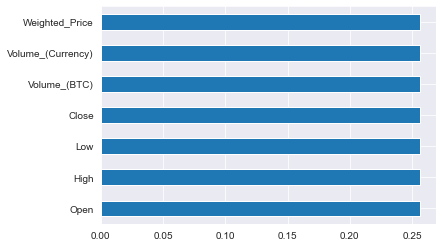

In [66]:
miss.plot(kind='barh')

In [67]:
checknan = df.isnull().values.any()
checknan

True

#### Dropping all rows that have NaN Values.

In [68]:
df = df.dropna(how='any')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


#### Checking if dataframe has any NaN values.

In [69]:
checknan2 = df.isna().values.any()
checknan2

False

In [70]:
len(df.High)

3613769

In [71]:
from datetime import datetime as dt

In [72]:
import matplotlib.pyplot as plt

In [73]:
import numpy as np

##### Converting timestamp to datetime type

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


In [75]:
df.Timestamp

0          1325317920
478        1325346600
547        1325350740
548        1325350800
1224       1325391360
              ...    
4857372    1617148560
4857373    1617148620
4857374    1617148680
4857375    1617148740
4857376    1617148800
Name: Timestamp, Length: 3613769, dtype: int64

In [76]:
df_date = pd.to_datetime(df.Timestamp, unit='s')

df.Timestamp = df_date
df

D:\anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [77]:
df['Timestamp']

0         2011-12-31 07:52:00
478       2011-12-31 15:50:00
547       2011-12-31 16:59:00
548       2011-12-31 17:00:00
1224      2012-01-01 04:16:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 3613769, dtype: datetime64[ns]

##### Renaming Timestamp column to Date

In [78]:
df.rename(columns={'Timestamp':'Date'}, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [80]:
len(df.Date)

3613769

In [81]:
len(df.Open)

3613769

In [82]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 248.1 MB


In [84]:
df

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


#### Reducing number of decimals of 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price' columns to 2

In [85]:
columns_round = ['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']

df[columns_round] = df.loc[:,columns_round].round(decimals = 2)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.46,2.00,4.39
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.00,210.72,4.39
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.86,171.38,4.53
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.00,41.22,4.58
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.50,6.88,4.58
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.38,81259.37,58692.75
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.29,428158.15,58693.23
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.71,100117.07,58696.20
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.72,42332.96,58761.87


#### Extracting Year, Month and date separately for easier analysis

In [87]:
df['Year'] = df.loc[:, 'Date'].dt.year
df['Month'] = df.loc[:, 'Date'].dt.month
df['Day'] = df.loc[:, 'Date'].dt.day

<ipython-input-87-49a1dff8274c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-49a1dff8274c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-49a1dff8274c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Displaying BTC Volume for the highest price

In [88]:
tmp = df[['High', 'Volume_(BTC)']].sort_values(['High', 'Volume_(BTC)'], ascending=False)
tmp.iloc[[0]]

,High,Volume_(BTC)
4832698,61781.83,2.46


#### All values grouped by month

In [89]:
month_values = df.groupby('Month').agg(lambda x: x.unique().mean())
month_values

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day
Month,,,,,,,,,
1,13511.542034,13506.870276,13393.976179,13612.685967,96.596211,91868.089217,13256.843245,2016.5,16.0
2,15782.119969,16030.102266,15795.157228,15958.271466,98.415057,78006.056264,15065.524006,2016.5,15.0
3,16981.912439,17205.435682,17016.587297,17090.778108,86.794391,63861.726696,16331.878190,2016.5,16.0
4,5135.018102,5128.988142,5124.184008,5175.018088,81.519935,32371.956943,5070.352190,2016.0,15.5
5,6227.180679,6280.815379,6233.192845,6267.484859,75.545739,42414.971341,6101.807992,2016.0,16.0
6,6305.041952,6316.812072,6297.891376,6341.631097,78.965539,37083.928803,6231.567041,2016.0,15.5
7,6925.901283,6920.774511,6907.289905,6938.060660,80.634525,39468.825457,6820.400384,2016.0,16.0
8,7276.331883,7305.319798,7225.835257,7289.375201,82.023775,35237.180112,7147.096006,2016.0,16.0
9,6995.863626,7027.845752,6969.961357,7006.225800,85.266992,34188.033650,6903.066211,2016.0,15.5


# Data Visualization

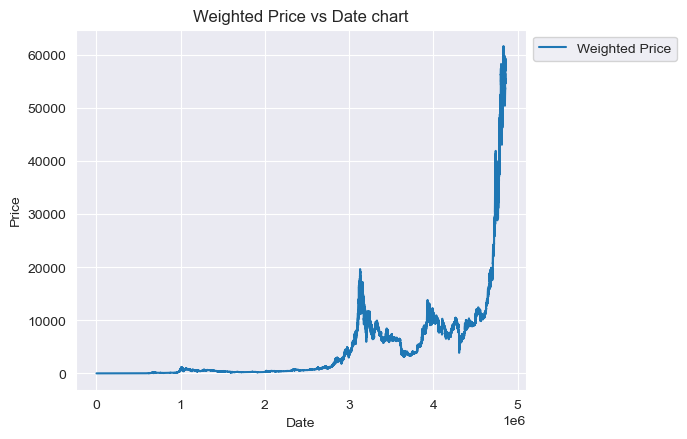

In [90]:
fig_pd = plt.figure(figsize=(5,4), dpi=100)
axes_pd = fig_pd.add_axes([0.1,0.1,0.9,0.9])

axes_pd.plot(df.index, df['Weighted_Price'].astype(int), label = 'Weighted Price')

axes_pd.set_xlabel('Date')
axes_pd.set_ylabel('Price')
axes_pd.set_title('Weighted Price vs Date chart')
lines, labels = axes_pd.get_legend_handles_labels()

axes_pd.legend(lines, labels, bbox_to_anchor=(1.0, 1.0), loc=0)
plt.show()

In [91]:
df

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Month,Day
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011,12,31
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.00,210.72,4.39,2011,12,31
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.86,171.38,4.53,2011,12,31
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.00,41.22,4.58,2011,12,31
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.50,6.88,4.58,2012,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.38,81259.37,58692.75,2021,3,30
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.29,428158.15,58693.23,2021,3,30
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.71,100117.07,58696.20,2021,3,30
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.72,42332.96,58761.87,2021,3,30


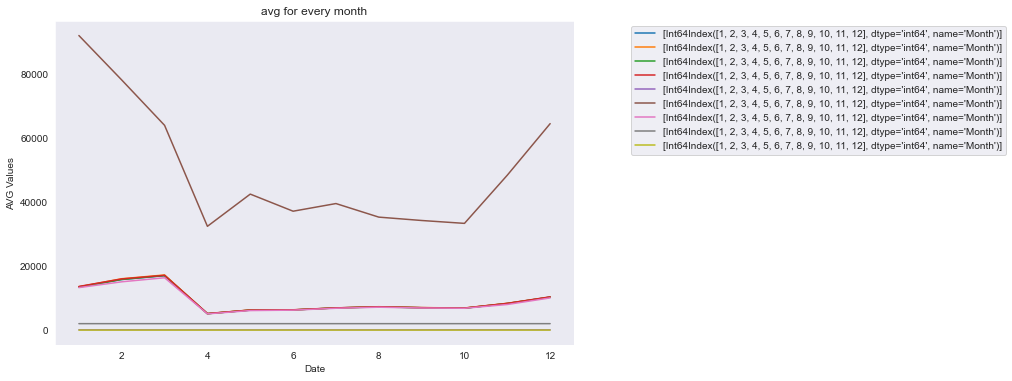

In [92]:
fig = plt.figure(figsize=(8,5))
ax= fig.add_axes([0.1,0.1,0.9,0.9])

ax.plot(month_values.index, month_values, label = [month_values.index.astype(int)])

ax.set_xlabel('Date')
ax.set_ylabel('AVG Values')
ax.set_title('avg for every month')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, bbox_to_anchor=(1.1, 1.0), loc=0)
ax.grid()
plt.show()

In [110]:
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

<AxesSubplot:ylabel='Count'>

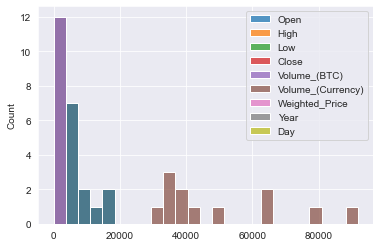

In [93]:
sns.histplot(month_values)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   Year               int64         
 9   Month              int64         
 10  Day                int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 459.9 MB


<AxesSubplot:xlabel='Month', ylabel='Count'>

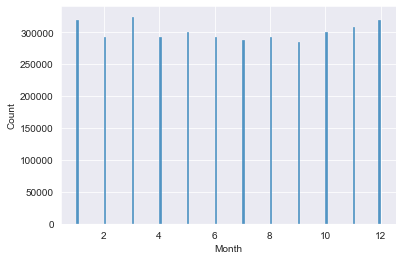

In [95]:
sns.histplot(df['Month'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   Year               int64         
 9   Month              int64         
 10  Day                int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 459.9 MB


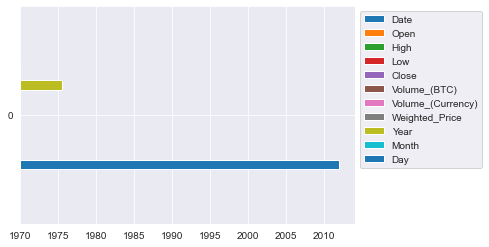

In [99]:
df[:1].plot(kind='barh').legend(loc=0, bbox_to_anchor=(1.0, 1.0))

In [100]:
type(df.index)

pandas.core.indexes.numeric.Int64Index

In [101]:
df.loc[:]

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Month,Day
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011,12,31
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.00,210.72,4.39,2011,12,31
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.86,171.38,4.53,2011,12,31
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.00,41.22,4.58,2011,12,31
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.50,6.88,4.58,2012,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.38,81259.37,58692.75,2021,3,30
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.29,428158.15,58693.23,2021,3,30
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.71,100117.07,58696.20,2021,3,30
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.72,42332.96,58761.87,2021,3,30


In [102]:
highest_price_date = df.loc[:, ['High']].sort_values(by='High', ascending=False)
highest_price_date

,High
4832698,61781.83
4832697,61781.80
4832696,61750.00
4832699,61747.76
4832700,61714.48
...,...
68291,4.15
71071,4.14
71070,4.14
45313,3.80


d.plotting.register_matplotlib_converters()

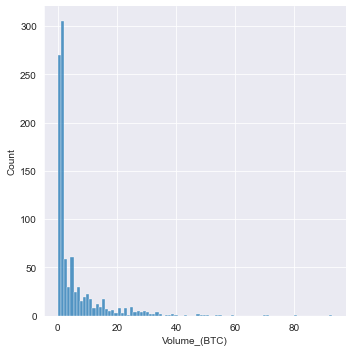

In [103]:
var_btc= df['Volume_(BTC)']
sns.displot(var_btc[:1000])

#### mathplot grid price vs date

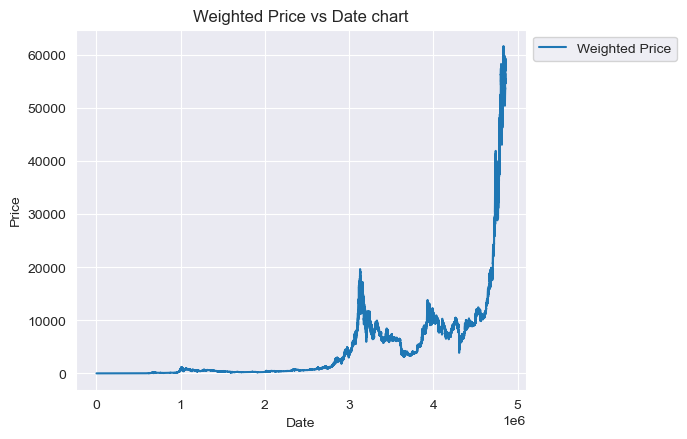

In [104]:
fig_pd = plt.figure(figsize=(5,4), dpi=100)
axes_pd = fig_pd.add_axes([0.1,0.1,0.9,0.9])

axes_pd.plot(df.index, df['Weighted_Price'].astype(int), label = 'Weighted Price')

axes_pd.set_xlabel('Date')
axes_pd.set_ylabel('Price')
axes_pd.set_title('Weighted Price vs Date chart')
lines, labels = axes_pd.get_legend_handles_labels()

axes_pd.legend(lines, labels, bbox_to_anchor=(1.0, 1.0), loc=0)
plt.show()

In [105]:
df.Weighted_Price = df.Weighted_Price.round(2)
df['Volume_(Currency)'].sort_values(ascending=False).astype(int)

D:\anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4743404    13900672
4734151    11629357
4794157    11492484
4796206    10910999
4804951    10633100
             ...   
910201            0
908055            0
907646            0
835131            0
2082919           0
Name: Volume_(Currency), Length: 3613769, dtype: int32

#### average of top 50 prices

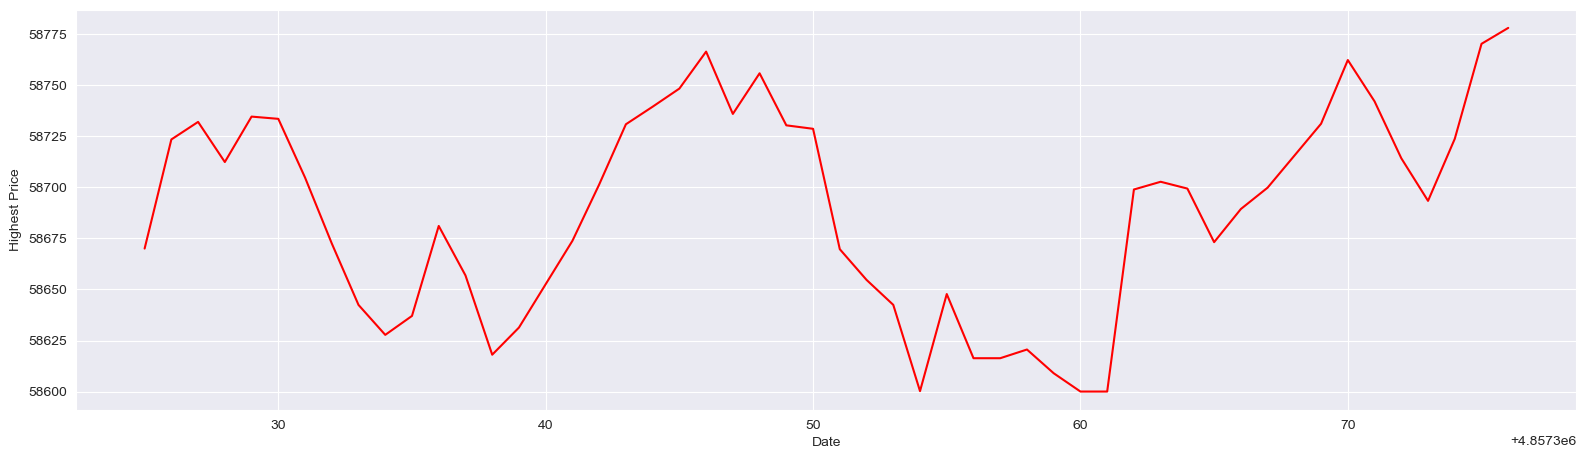

In [106]:
fig_avg = plt.figure(figsize=(5,4), dpi=100)
axes_avg = fig_avg.add_axes([0.1,0.1,3,1])
axes_avg.set_xlabel('Date')
axes_avg.set_ylabel('Highest Price')
axes_avg.plot(df.index[-50:], df['High'][-50:], color='red')

In [107]:
df.index[-50:]

Int64Index([4857325, 4857326, 4857327, 4857328, 4857329, 4857330, 4857331,
            4857332, 4857333, 4857334, 4857335, 4857336, 4857337, 4857338,
            4857339, 4857341, 4857342, 4857343, 4857344, 4857345, 4857346,
            4857347, 4857348, 4857349, 4857350, 4857351, 4857352, 4857353,
            4857354, 4857355, 4857356, 4857357, 4857358, 4857359, 4857360,
            4857361, 4857362, 4857363, 4857364, 4857365, 4857366, 4857367,
            4857369, 4857370, 4857371, 4857372, 4857373, 4857374, 4857375,
            4857376],
           dtype='int64')

In [108]:
df

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Month,Day
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011,12,31
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.00,210.72,4.39,2011,12,31
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.86,171.38,4.53,2011,12,31
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.00,41.22,4.58,2011,12,31
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.50,6.88,4.58,2012,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.38,81259.37,58692.75,2021,3,30
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.29,428158.15,58693.23,2021,3,30
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.71,100117.07,58696.20,2021,3,30
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.72,42332.96,58761.87,2021,3,30


#### chart price vs volume

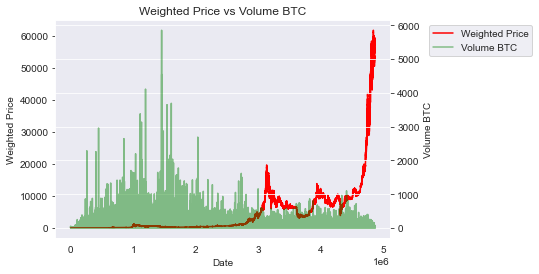

In [109]:
fig = plt.figure()
ax= fig.add_subplot()
ax2=ax.twinx()

ax.plot(df.index, df['Weighted_Price'], color='red', label='Weighted Price')
ax2.plot(df.index, df['Volume_(BTC)'], 'g-', label='Volume BTC', alpha=0.45)
ax.set_xlabel('Date')
ax.set_ylabel('Weighted Price')
ax.set_title('Weighted Price vs Volume BTC')
ax2.set_xlabel('')
ax2.set_ylabel('Volume BTC')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, bbox_to_anchor=(1.1, 1.0), loc=0)
ax.grid()
plt.show()

weekly resample